In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import os
from astropy.io.fits import getheader
from astropy.io.fits import getdata
from sys import getsizeof
import matplotlib as mpl
import math
%matplotlib inline

## DOWNLOAD IMAGES PLOT THEM

In [16]:
##OPENDATA
transit = np.sort(glob.glob('NEWDATA/*'))

In [17]:
# put the 2D numpy arrays (i.e. the images) into a stack of images
stack_of_images_transit = np.zeros((len(transit), 1336, 2004))

for image_number, transit_file in enumerate(transit):
    stack_of_images_transit[image_number,:,:] = getdata(transit_file)

In [18]:
#print the dimensions of the 3d numpy array
print('(N_Images, N_rows, N_cols)')
print(stack_of_images_transit.shape)

(N_Images, N_rows, N_cols)
(57, 1336, 2004)


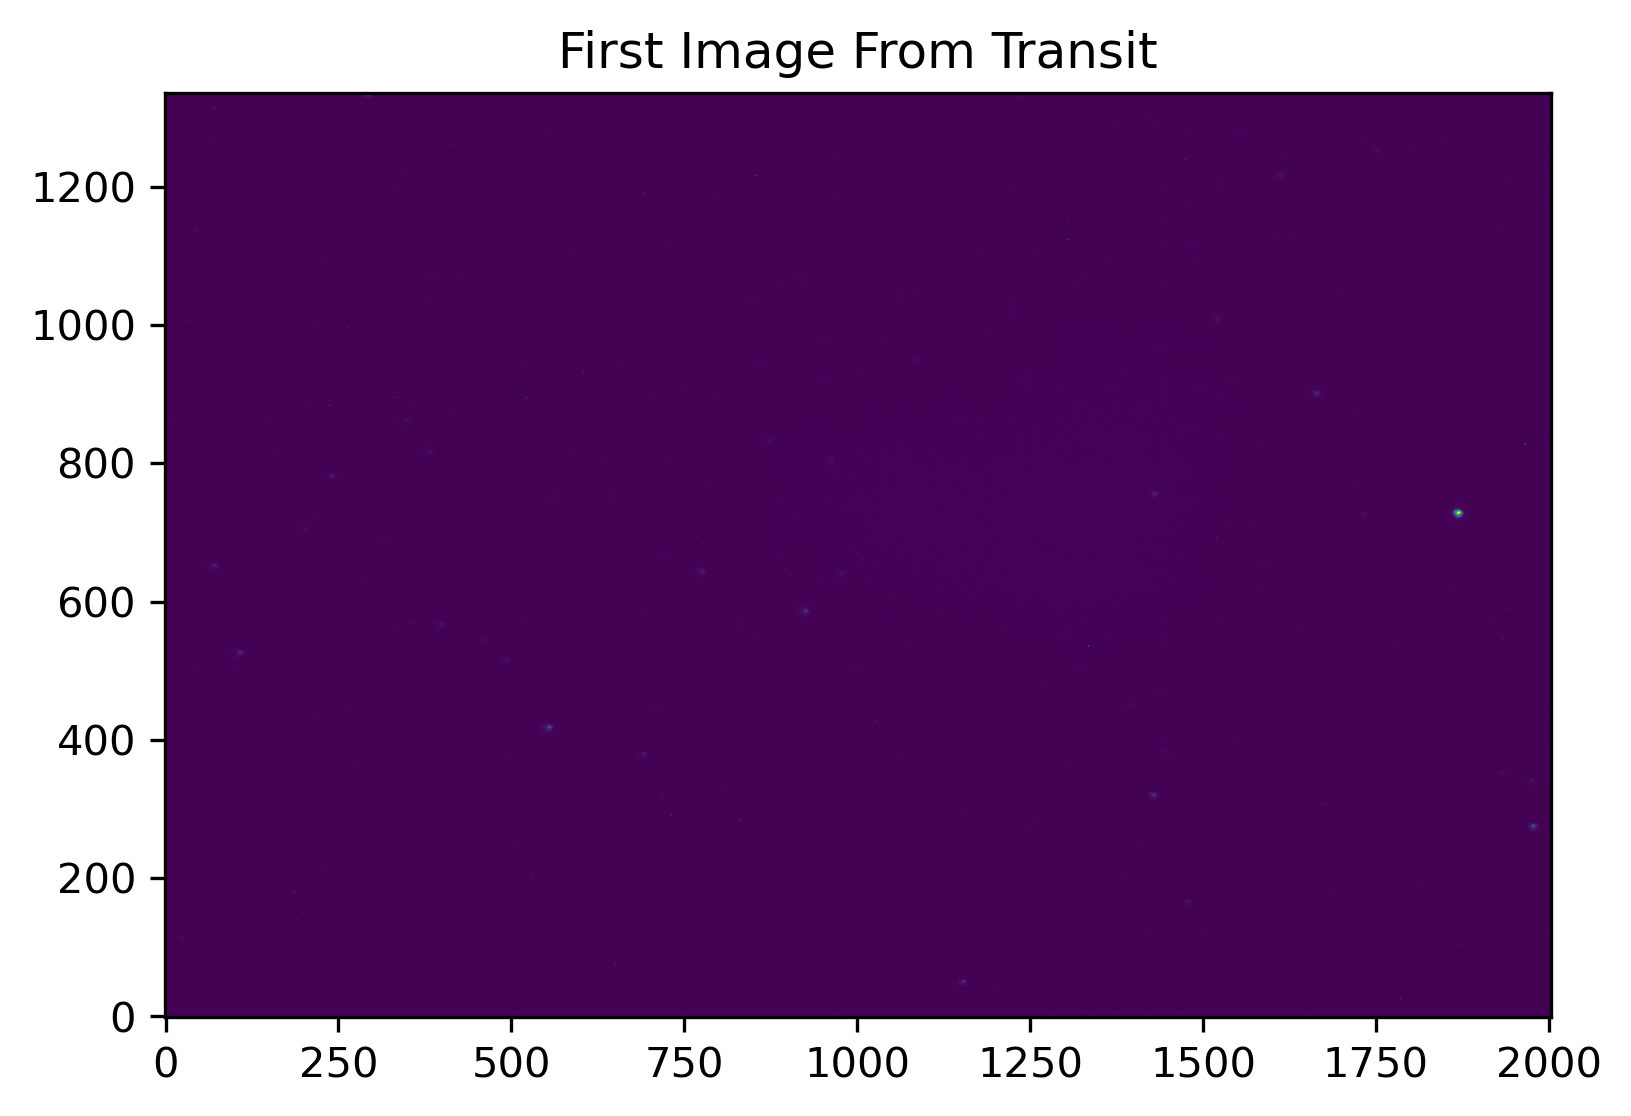

In [19]:
##PLOT RAW
plt.figure(figsize=(6,4),dpi=300)
plt.imshow(stack_of_images_transit[0],
           origin='lower')
plt.title('First Image From Transit')
plt.show()

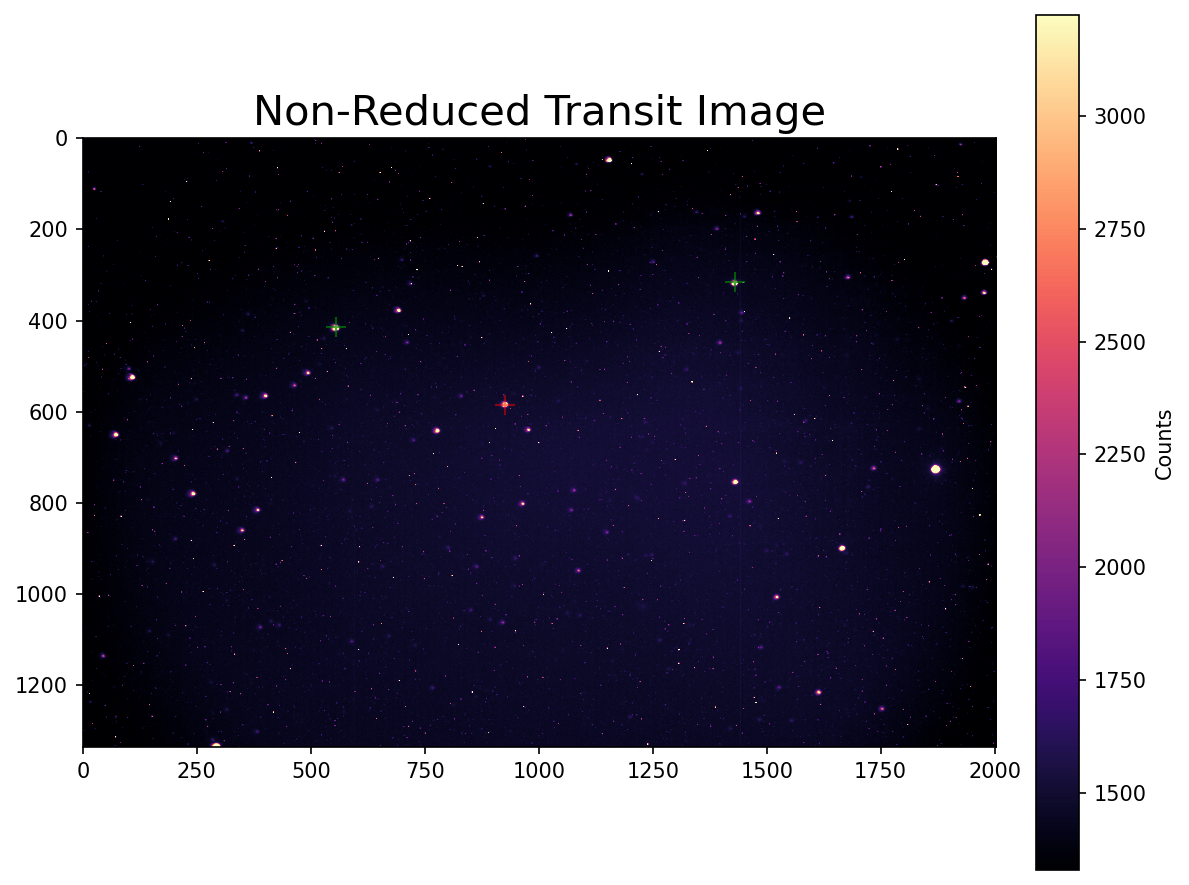

In [20]:
low  = np.percentile(stack_of_images_transit, 10) 
high = np.percentile(stack_of_images_transit, 99.9)

# create figure object
plt.figure(figsize=[8,6],dpi=150)

# plot the image
im = plt.imshow(stack_of_images_transit[0], 
                vmin=low,vmax=high,cmap='magma')
#                norm=mpl.colors.LogNorm(),
#                origin='lower',cmap='magma')

plt.scatter(925,585, s= 100, marker = "+", alpha = 0.5, lw = 1, color = "red")
plt.scatter(1430,315, s= 100, marker = "+", alpha = 0.7, lw = 1, color = "green")
plt.scatter(555,415, s= 100, marker = "+", alpha = 0.7, lw = 1, color = "green")
# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts')
plt.tight_layout()
plt.title('Non-Reduced Transit Image',fontsize=20)
plt.savefig("Non_Reduced_Image.png")
plt.show()

## MEDIAN DARK AND FLAT FIELD NO MASTER FLAT YET THO

In [21]:
darks_120 = np.sort(glob.glob('DARK/*'))

In [22]:
##stack the dark images

stack_of_images_darks_120 = np.zeros((len(darks_120), 1336, 2004))

for image_number, dark_120_file in enumerate(darks_120):
    stack_of_images_darks_120[image_number,:,:] = getdata(dark_120_file)

In [23]:
##make a median

darks_120_median = np.median(stack_of_images_darks_120, axis=0)
print(darks_120_median.shape)

(1336, 2004)


In [24]:
##save it as a file

hdu_darks_120_exposure = fits.PrimaryHDU(darks_120_median)
hdu_darks_120_exposure.writeto('darks_120_exposure_median.fits', overwrite = True)

In [25]:
vflat = np.sort(glob.glob('VFLAT/*'))

In [26]:
stack_of_images_vflat = np.zeros((len(vflat), 1336, 2004))

for image_number, vflat_file in enumerate(vflat):
    stack_of_images_vflat[image_number,:,:] = getdata(vflat_file)

In [27]:
vflat_median = np.median(stack_of_images_vflat, axis=0)
print(vflat_median.shape)

(1336, 2004)


In [28]:
hdu_vflat_exposure = fits.PrimaryHDU(vflat_median)
hdu_vflat_exposure.writeto('vflat_exposure_median.fits', overwrite = True)

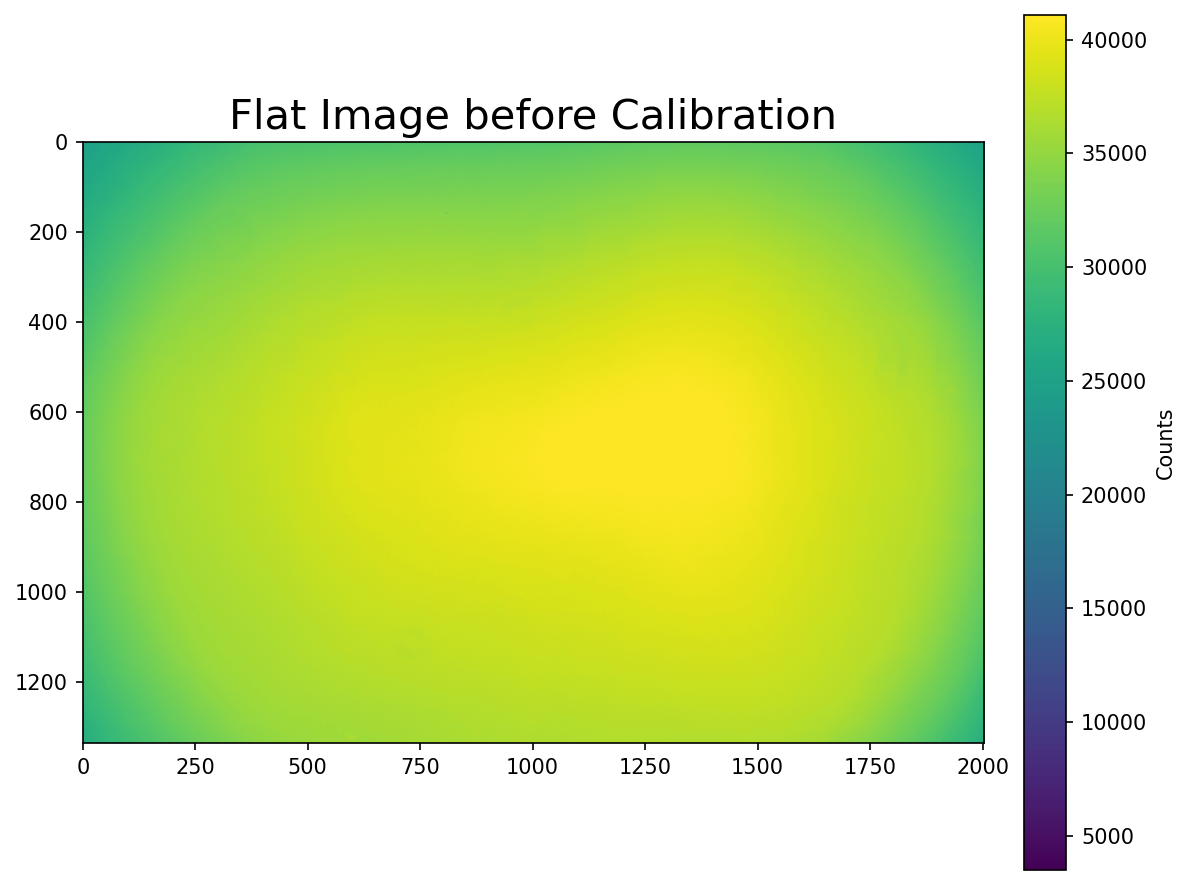

In [29]:
##raw median flat before calibrating

low  = np.percentile(stack_of_images_vflat, 10) 
high = np.percentile(stack_of_images_vflat, 99.9)

# create figure object
plt.figure(figsize=[8,6],dpi=150)

# plot the image
im = plt.imshow(stack_of_images_vflat[0], 
                vmin=low,vmax=high)
                #norm=mpl.colors.LogNorm(),
                #origin='lower',cmap='magma')


# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts')
plt.tight_layout()
plt.title('Flat Image before Calibration',fontsize=20)
plt.show()

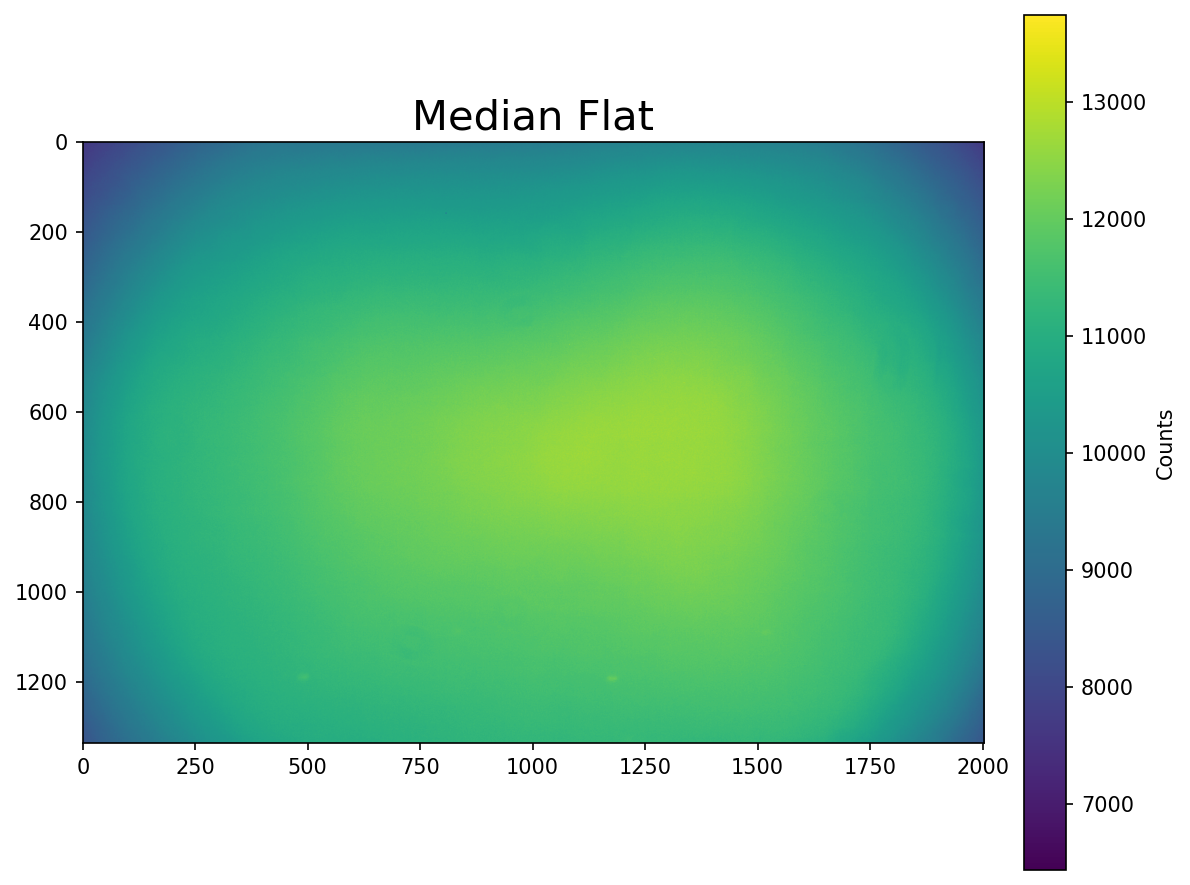

In [47]:
# create figure object
plt.figure(figsize=[8,6],dpi=150)

# plot the image
im = plt.imshow(vflat_median, 
                )
                #norm=mpl.colors.LogNorm(),
                #origin='lower',cmap='magma')


# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts')
plt.tight_layout()
plt.title('Median Flat',fontsize=20)
plt.savefig("Median_Flat.png")
plt.show()

## MAKING A MASTER FLAT ACCORDING TO EMMA'S INSTRUCTION

In [31]:
darks_1 = np.sort(glob.glob('DARKS1/*'))

In [32]:
##stack the dark images

stack_of_images_darks_1 = np.zeros((len(darks_1), 1336, 2004))

for image_number, dark_1_file in enumerate(darks_1):
    stack_of_images_darks_1[image_number,:,:] = getdata(dark_1_file)

In [33]:
darks_1_median = np.median(stack_of_images_darks_1, axis=0)
print(darks_1_median.shape)

(1336, 2004)


In [34]:
hdu_darks_1_exposure = fits.PrimaryHDU(darks_1_median)
hdu_darks_1_exposure.writeto('darks_1_exposure_median.fits', overwrite = True)

In [35]:
stack_of_images_vflat_norm = np.zeros((len(vflat), 1336, 2004))

for i in np.arange(0,len(vflat)):
    stack_of_images_vflat_norm[i,:,:] = (stack_of_images_vflat[i,:,:] - darks_1_median)/np.median(stack_of_images_vflat[i,:,:])
    

In [36]:
vflat_median_master = np.median(stack_of_images_vflat_norm, axis=0)
print(vflat_median_master.shape)

(1336, 2004)


In [37]:
##USE THIS ONE FOR CALIBRATION
hdu_vflat_master_exposure = fits.PrimaryHDU(vflat_median_master)
hdu_vflat_master_exposure.writeto('vflat_Master.fits', overwrite = True)

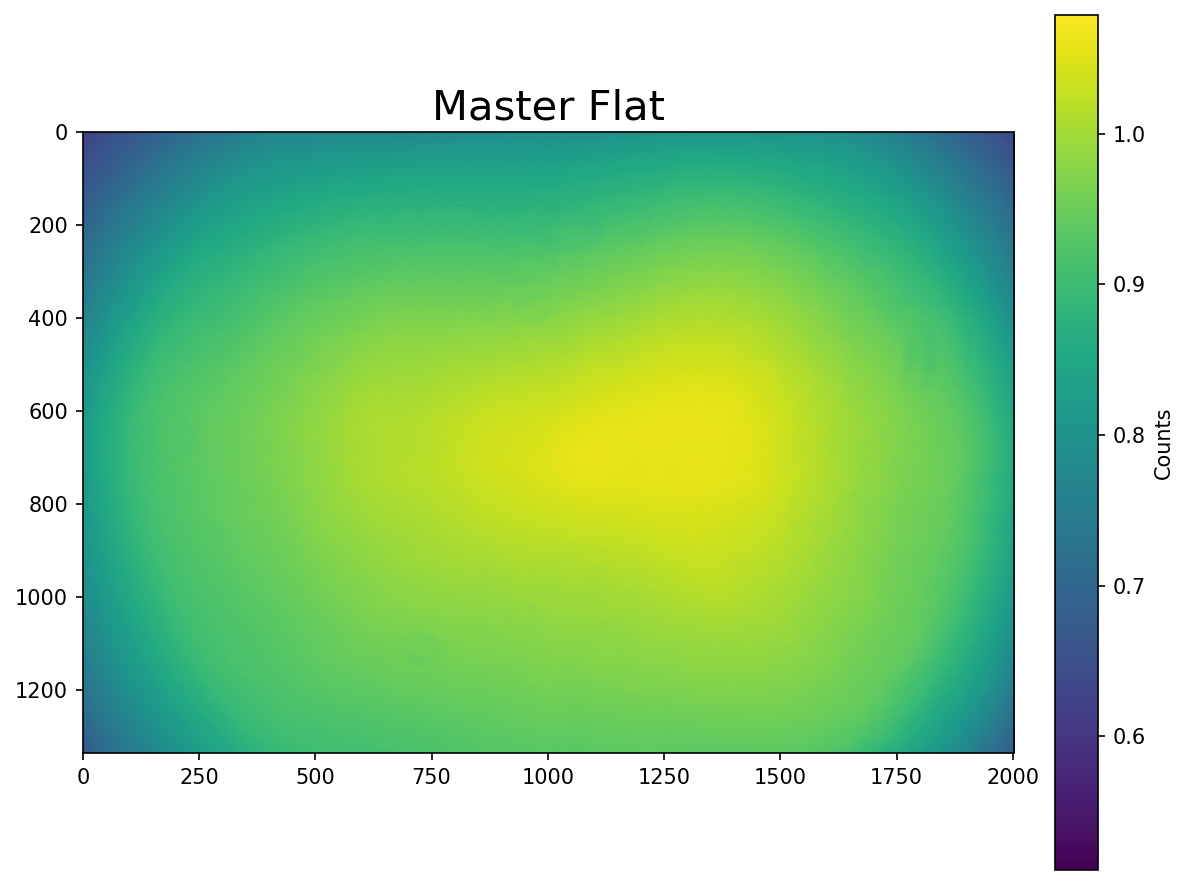

In [48]:


# create figure object
plt.figure(figsize=[8,6],dpi=150)

# plot the image
im = plt.imshow(vflat_median_master, 
)
                #norm=mpl.colors.LogNorm(),
                #origin='lower',cmap='magma')


# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts')
plt.tight_layout()
plt.title('Master Flat',fontsize=20)
plt.savefig('Master_Flat.png')
plt.show()

In [39]:
reduced_transit = np.zeros((len(stack_of_images_transit), 1336, 2004))

for i in np.arange(0,len(reduced_transit)):
    reduced_transit[i,:,:] = (stack_of_images_transit[i,:,:] - darks_120_median)/(vflat_median_master)

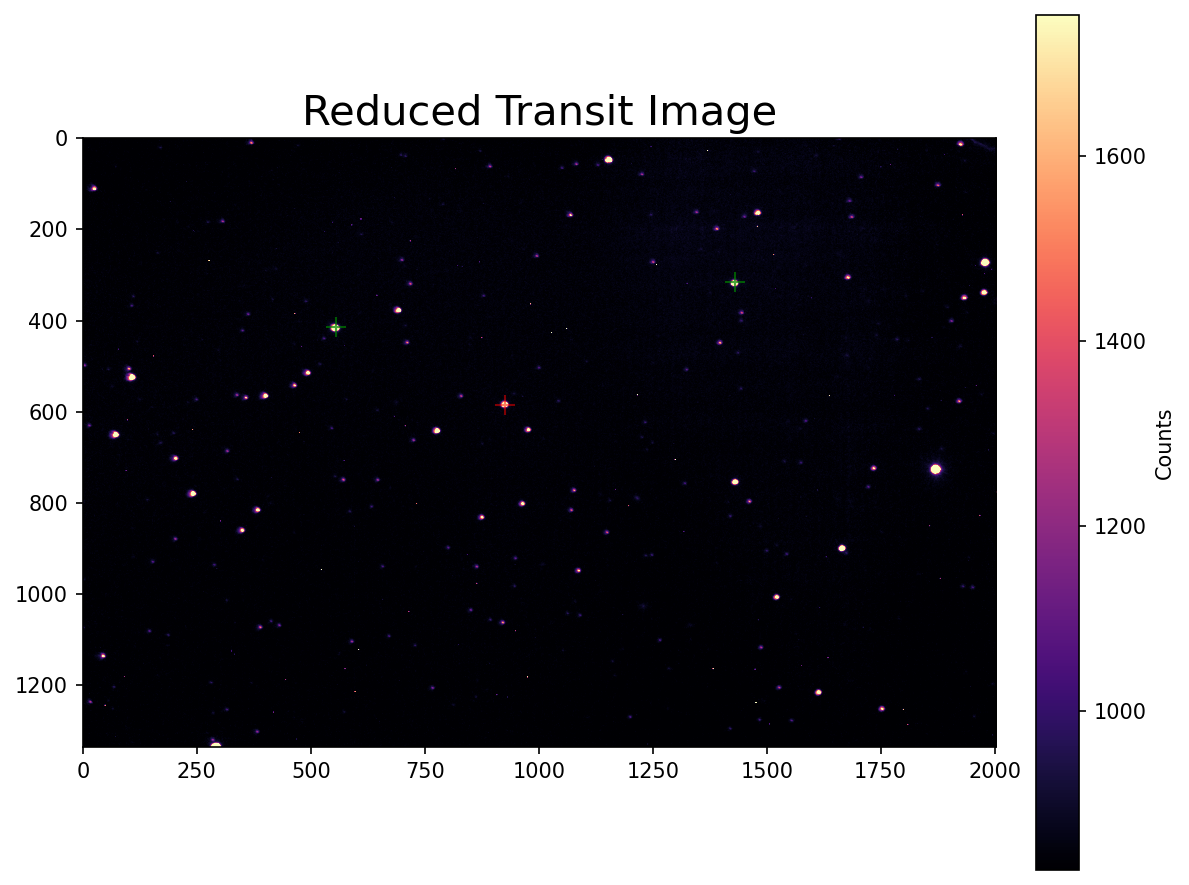

In [40]:
low  = np.percentile(reduced_transit, 10) 
high = np.percentile(reduced_transit, 99.9)

# create figure object
plt.figure(figsize=[8,6],dpi=150)

# plot the image
im = plt.imshow(reduced_transit[0], 
                vmin=low,vmax=high,cmap='magma')
#                norm=mpl.colors.LogNorm(),
#                origin='lower',cmap='magma')

plt.scatter(925,585, s= 100, marker = "+", alpha = 0.5, lw = 1, color = "red")
plt.scatter(1430,315, s= 100, marker = "+", alpha = 0.7, lw = 1, color = "green")
plt.scatter(555,415, s= 100, marker = "+", alpha = 0.7, lw = 1, color = "green")
# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts')
plt.tight_layout()
plt.title('Reduced Transit Image',fontsize=20)
plt.savefig('Reduced_Transit_Image.png')
plt.show()

In [41]:
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths
import matplotlib.pyplot as plt

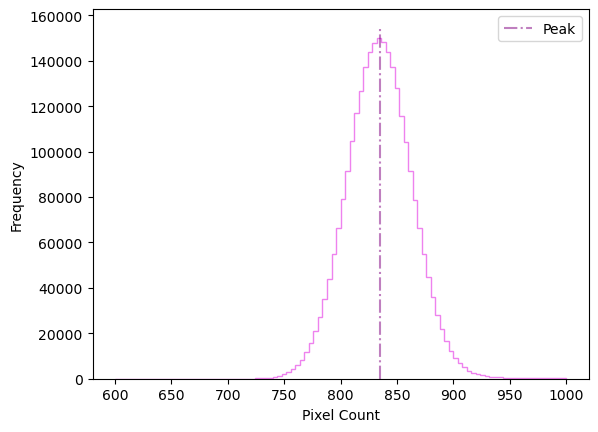

In [46]:
plt.hist(np.ravel(reduced_transit[0]), bins=100, range=(600,1000),histtype='step', color = "violet")
plt.vlines(835,0,155000, color = 'purple', linestyle = '-.',alpha = 0.5, label = "Peak")
plt.legend()
plt.xlabel("Pixel Count")
plt.ylabel("Frequency")
plt.savefig("Background_Histogram.png")

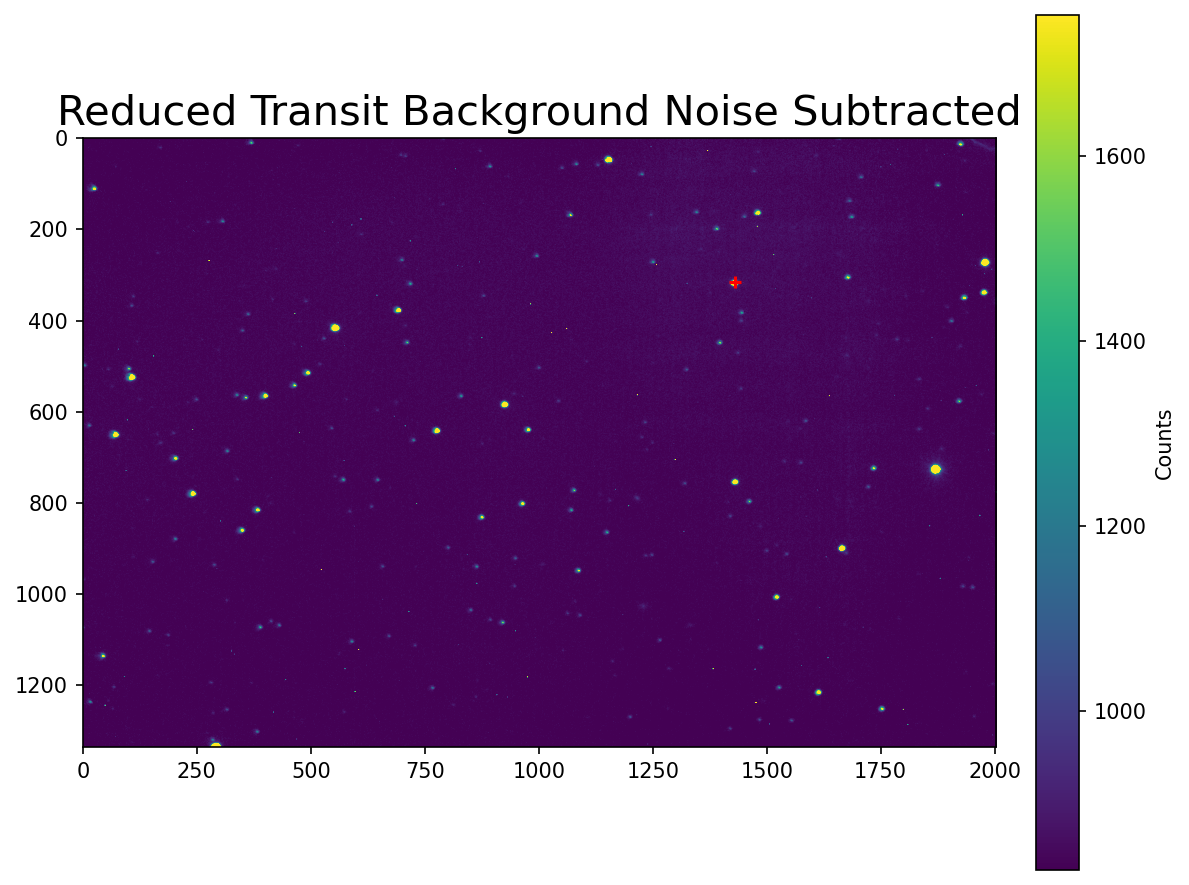

In [43]:
low  = np.percentile(reduced_transit, 10) 
high = np.percentile(reduced_transit, 99.9)

# create figure object
plt.figure(figsize=[8,6],dpi=150)

# plot the image
im = plt.imshow(reduced_transit[0], 
                vmin=low,vmax=high)
#                norm=mpl.colors.LogNorm(),
#                origin='lower',cmap='magma')

plt.scatter(1430,315, marker='+', color='red')
# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts')
plt.tight_layout()
plt.title('Reduced Transit Background Noise Subtracted',fontsize=20)
plt.show()

In [44]:
stack_of_images_transit_closeup = np.zeros((len(transit), 90, 90))

for image_number, transit_file in enumerate(transit):
    if image_number <=6:
        new_image = reduced_transit[image_number,582-45:582+45,925-45:925+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(7,14):
        new_image = reduced_transit[image_number,570-45:570+45,900-45:900+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(14,20):
        new_image = reduced_transit[image_number,560-45:560+45,1100-45:1100+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(20,26):
        new_image = reduced_transit[image_number,550-45:550+45,1070-45:1070+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(26,31):
        new_image = reduced_transit[image_number,530-45:530+45,1050-45:1050+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number == 31:
        new_image = reduced_transit[image_number,540-45:540+45,1060-45:1060+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(31,37):
        new_image = reduced_transit[image_number,660-45:660+45,1025-45:1025+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(37,41):
        new_image = reduced_transit[image_number,650-45:650+45,1010-45:1010+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(41,47):
        new_image = reduced_transit[image_number,635-45:635+45,980-45:980+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(47,52):
        new_image = reduced_transit[image_number,620-45:620+45,960-45:960+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image
    if image_number in np.arange(52,58):
        new_image = reduced_transit[image_number,605-45:605+45,940-45:940+45]
        stack_of_images_transit_closeup[image_number,:,:] = new_image

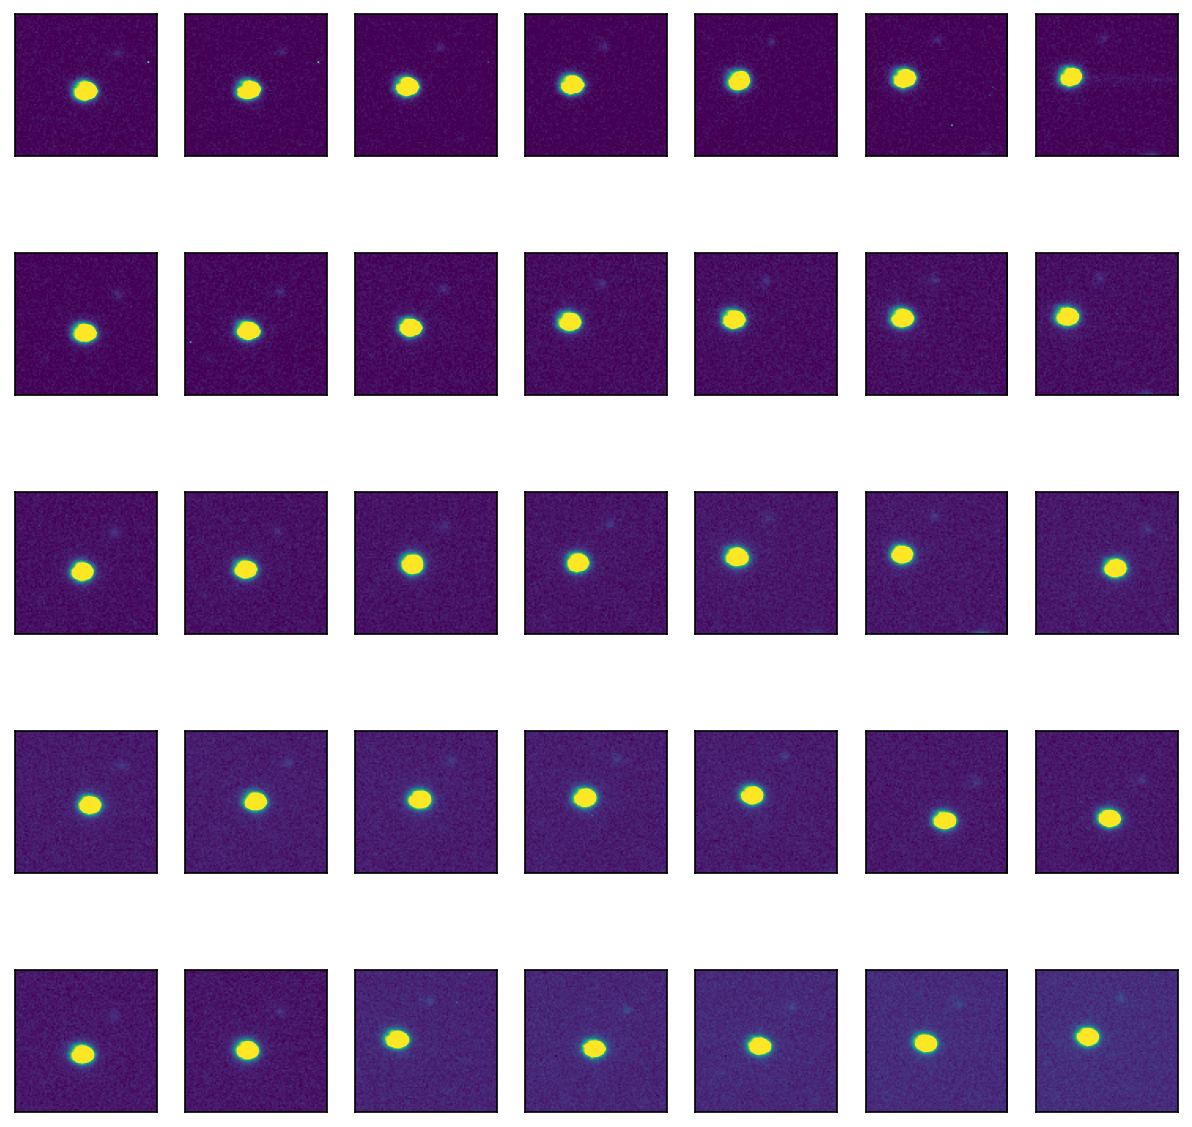

In [59]:
%matplotlib inline
#plot some of the science images to ensure the stars are visible
fig, axes = plt.subplots(nrows=5,ncols=7,dpi=150,figsize=(10,10))

for i, (image, ax) in enumerate(zip(stack_of_images_transit_closeup, axes.flat)):
    im = ax.imshow(image,vmin=low,vmax=high)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
plt.savefig("Closeup_Transit.png")

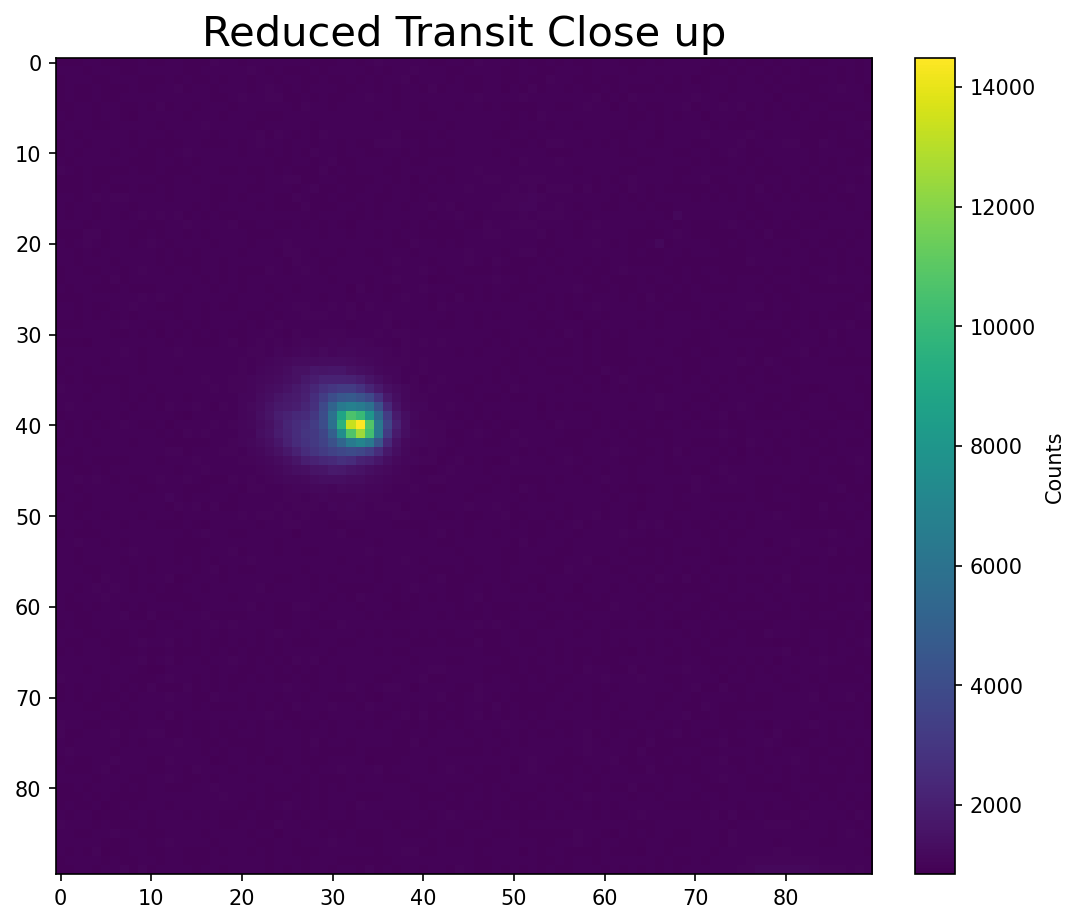

In [51]:


# create figure object
plt.figure(figsize=[8,6],dpi=150)

# plot the image
im = plt.imshow(stack_of_images_transit_closeup[35]) 
#               vmin=low,vmax=high
#                norm=mpl.colors.LogNorm(),
#origin='lower',cmap='magma')

# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts')
plt.tight_layout()
plt.title('Reduced Transit Close up',fontsize=20)
plt.show()

In [52]:
star_pixels_y, star_pixels_x = np.where(stack_of_images_transit_closeup[0,:,:] > 2000)

x_med = math.ceil(np.median(star_pixels_x))
y_med = math.ceil(np.median(star_pixels_y))

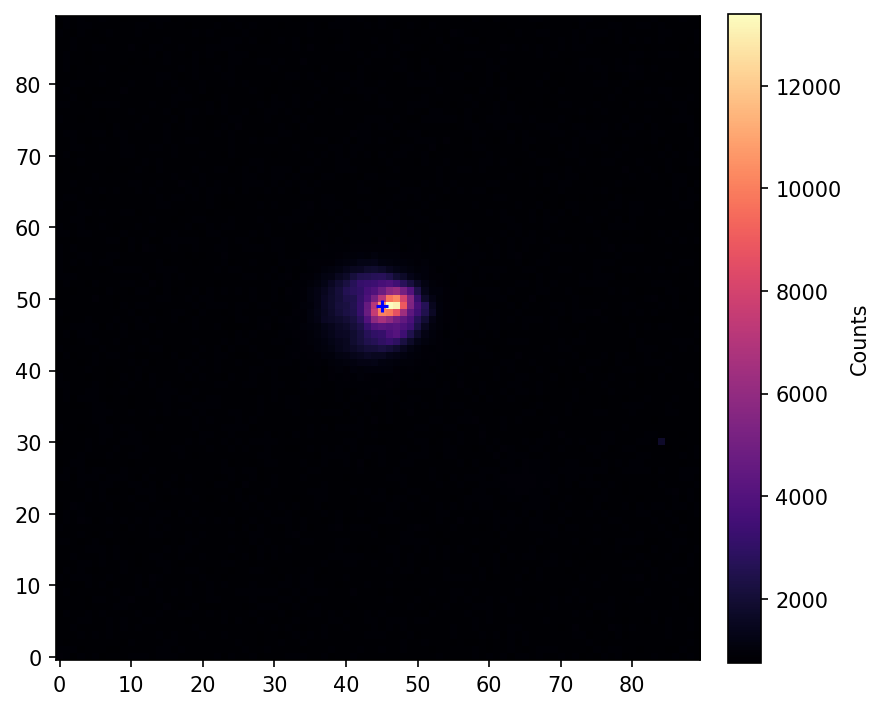

In [53]:
%matplotlib inline
plt.figure(figsize=(6,6), dpi=150)

# plot the image
im = plt.imshow(stack_of_images_transit_closeup[0], 
                origin='lower',cmap='magma')


# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts',)
plt.scatter(x_med, y_med, marker='+', color='blue')

plt.tight_layout()

In [54]:
threshold=2000
y_centers = np.array([])
x_centers = np.array([])

for i in range(stack_of_images_transit_closeup.shape[0]):
    max_pix_y, max_pix_x = np.where(stack_of_images_transit_closeup[i,:,:] > threshold)
    y_center = int(math.ceil(np.median(max_pix_y)))
    x_center = int(math.ceil(np.median(max_pix_x)))
    y_centers = np.append(y_centers, y_center)
    x_centers = np.append(x_centers, x_center)
    


In [55]:
def zoomed_image(image_data, image_center_x, image_center_y, image_interval):
    #image interval will be the x and y dimensions of the 'new box'
    star_centered_images = np.zeros((image_data.shape[0],image_interval,image_interval))
    for i in range(star_centered_images.shape[0]):
        star_centered_images[i,:,:] = image_data[i,
                            int(image_center_y[i]-(interval/2)):int(image_center_y[i]+(interval/2)),
                            int(image_center_x[i]-(interval/2)):int(image_center_x[i]+(interval/2))]
            
    return star_centered_images

In [56]:
interval = 40
zoomed_images = zoomed_image(stack_of_images_transit_closeup, x_centers, y_centers, interval )


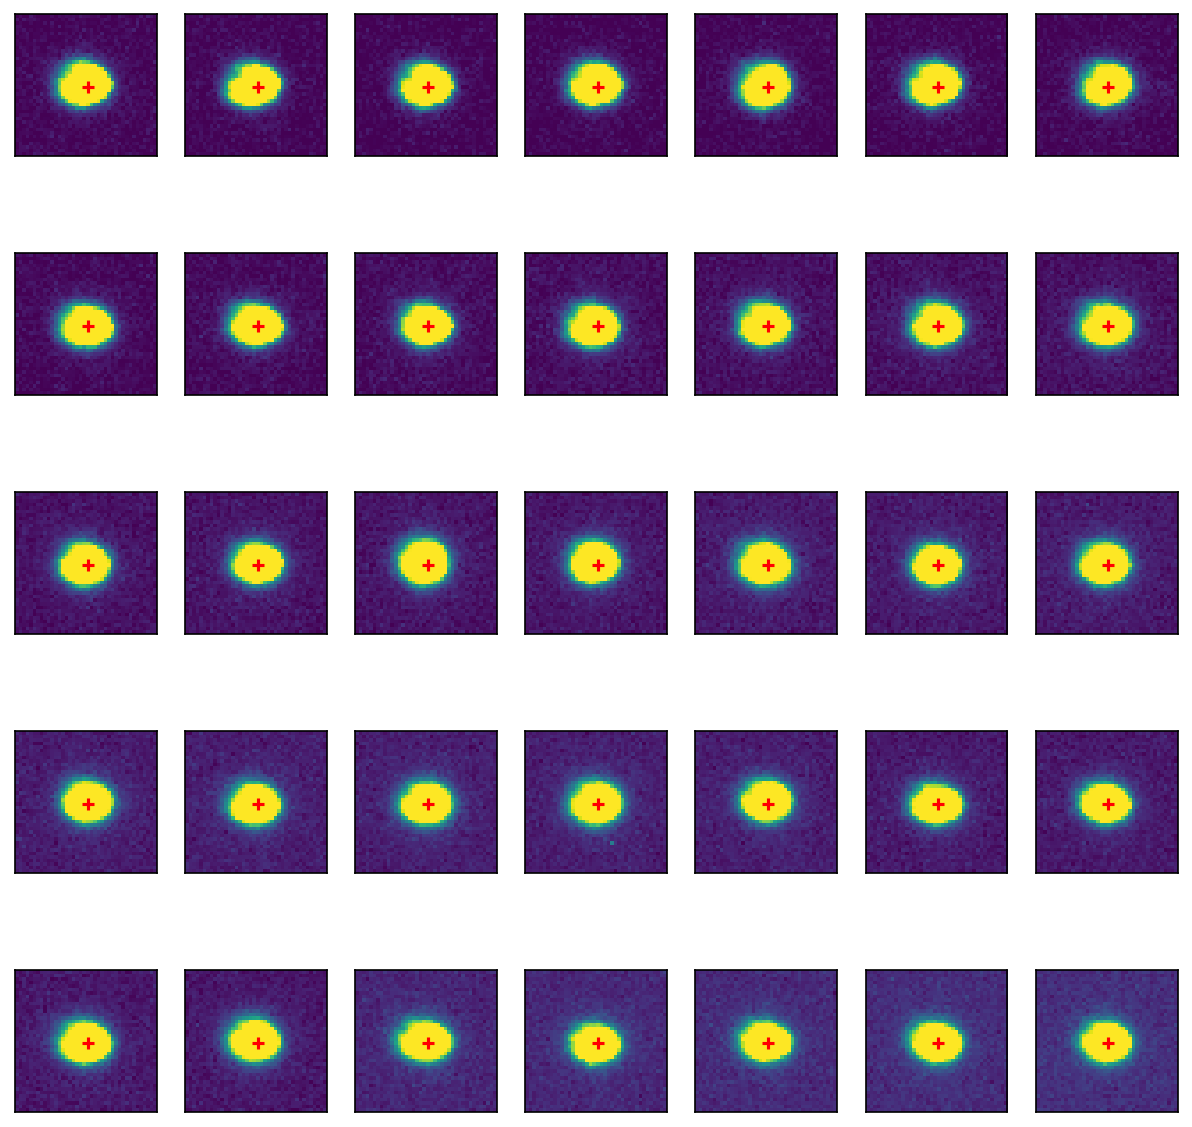

In [58]:
%matplotlib inline
#plot the first 15 images to ensure that the star is centered in each of the star boxes
fig, axes = plt.subplots(nrows=5,ncols=7,dpi=150,figsize=(10,10))

for i, (image, ax) in enumerate(zip(zoomed_images, axes.flat)):
    im = ax.imshow(image,vmin=low,vmax=high)
    ax.scatter(20,20, marker='+', color='red')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
plt.savefig("Centered_Transit.png")

In [40]:
close_up_reference = np.zeros((len(transit), 90, 90))


for image_number, transit_file in enumerate(transit):
    if image_number <=6:
        new_image = reduced_transit[image_number,582-45 - 167:582+45 - 167,925-45 - 375:925+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(7,14):
        new_image = reduced_transit[image_number,570-45 - 167:570+45 - 167,900-45 - 375:900+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(14,20):
        new_image = reduced_transit[image_number,560-45 - 167:560+45 - 167,1100-45 - 375:1100+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(20,26):
        new_image = reduced_transit[image_number,550-45 - 167:550+45 - 167,1070-45 - 375:1070+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(26,31):
        new_image = reduced_transit[image_number,530-45 - 167:530+45 - 167,1050-45 - 375:1050+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number == 31:
        new_image = reduced_transit[image_number,540-45 - 167:540+45 - 167,1060-45 - 375:1060+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(31,37):
        new_image = reduced_transit[image_number,660-45 - 167:660+45 - 167,1025-45 - 375:1025+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(37,41):
        new_image = reduced_transit[image_number,650-45 - 167:650+45 - 167,1010-45 - 375:1010+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(41,47):
        new_image = reduced_transit[image_number,635-45 - 167:635+45 - 167,980-45 - 375:980+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(47,52):
        new_image = reduced_transit[image_number,620-45 - 167:620+45 - 167,960-45 - 375:960+45 - 375]
        close_up_reference[image_number,:,:] = new_image
    if image_number in np.arange(52,58):
        new_image = reduced_transit[image_number,605-45 - 167:605+45 - 167,940-45 - 375:940+45 - 375]
        close_up_reference[image_number,:,:] = new_image

In [41]:
close_up_reference = getdata('close_up_reference.fits')

In [42]:
threshold=2000
y_centers_ref = np.array([])
x_centers_ref = np.array([])

for i in range(close_up_reference.shape[0]):
    max_pix_y, max_pix_x = np.where(close_up_reference[i,:,:] > threshold)
    y_center = int(math.ceil(np.median(max_pix_y)))
    x_center = int(math.ceil(np.median(max_pix_x)))
    y_centers_ref = np.append(y_centers_ref, y_center)
    x_centers_ref = np.append(x_centers_ref, x_center)

In [43]:
interval = 40
zoomed_images_ref = zoomed_image(close_up_reference, x_centers_ref, y_centers_ref, interval )

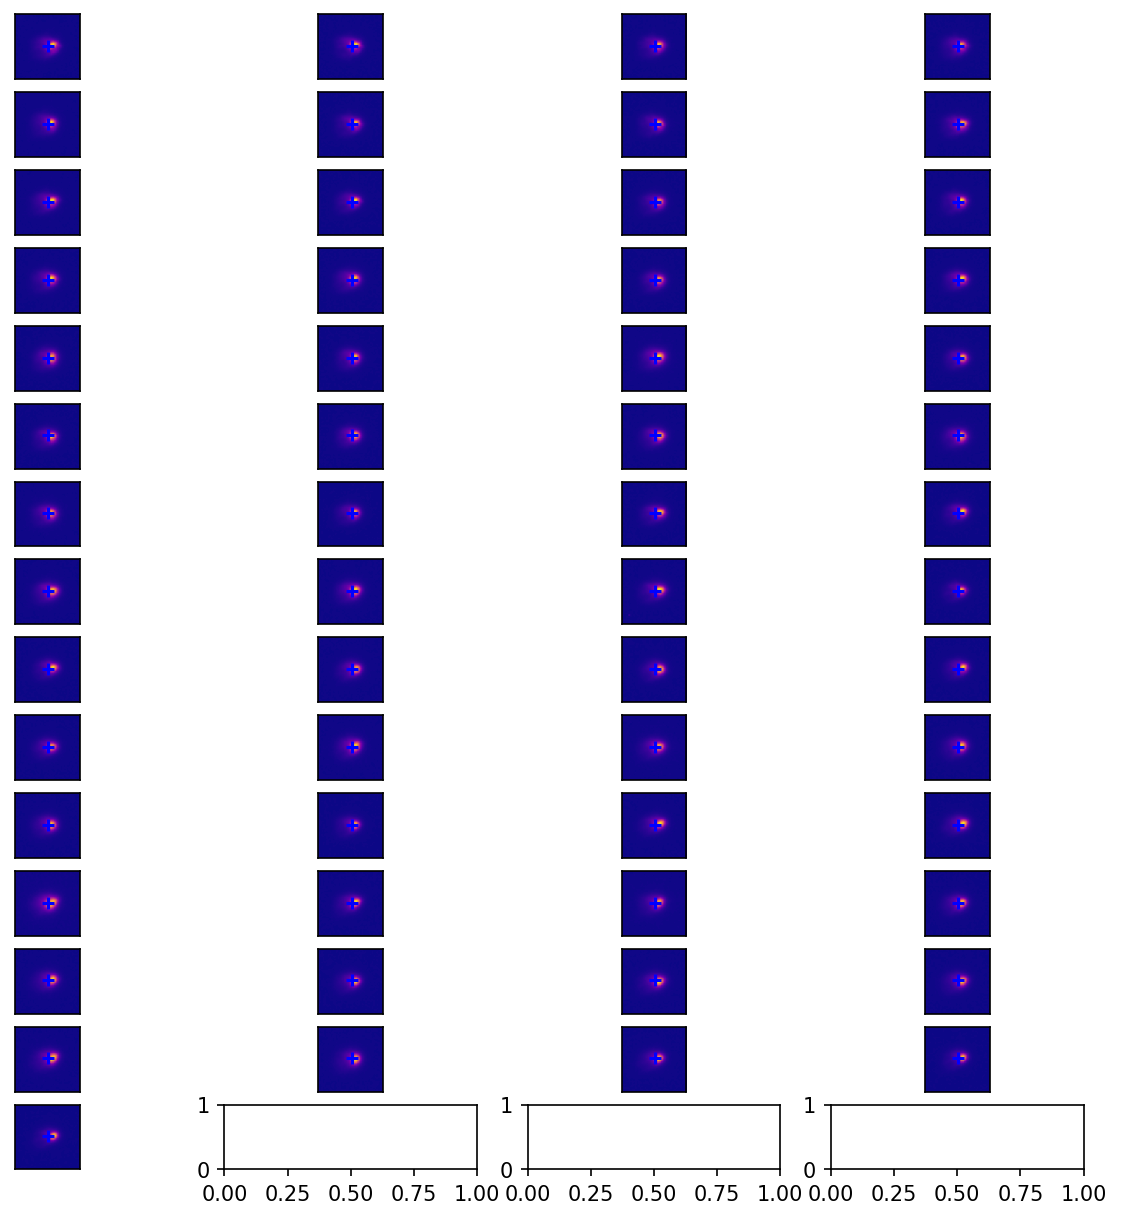

In [44]:
%matplotlib inline
#plot the first 15 images to ensure that the star is centered in each of the star boxes
fig, axes = plt.subplots(nrows=15,ncols=4,dpi=150,figsize=(10,10))

for i, (image, ax) in enumerate(zip(zoomed_images_ref, axes.flat)):
    im = ax.imshow(image, origin = 'lower', cmap = "plasma")
    ax.scatter(20,20, marker='+', color='blue')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

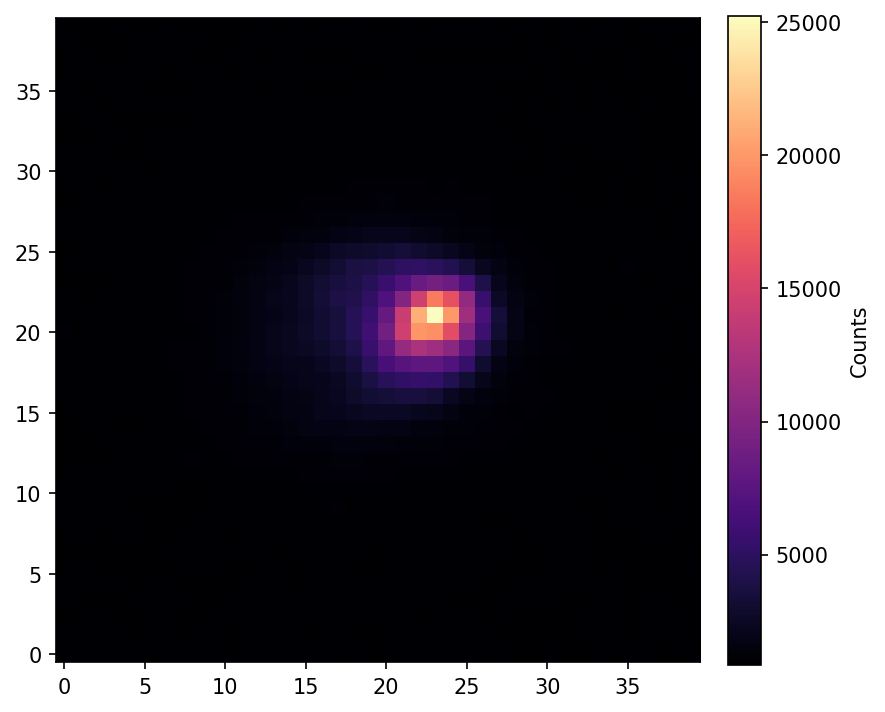

In [45]:
%matplotlib inline
plt.figure(figsize=(6,6), dpi=150)

# plot the image
im = plt.imshow(zoomed_images_ref[35], 
                origin='lower',cmap='magma')


# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts',)

plt.tight_layout()

In [46]:
hdu_zoomed_images_ref = fits.PrimaryHDU(zoomed_images_ref)
hdu_zoomed_images_ref.writeto('zoomed_images_ref.fits', overwrite = True)

In [47]:

close_up_reference2 = np.zeros((len(transit), 90, 90))

for image_number, transit_file in enumerate(transit):
    if image_number <=6:
        new_image = reduced_transit[image_number,582-45 - 267:582+45 - 267,925-45 + 505:925+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(7,14):
        new_image = reduced_transit[image_number,570-45 - 267:570+45 - 267,900-45 + 505:900+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(14,20):
        new_image = reduced_transit[image_number,560-45 - 267:560+45 - 267,1100-45 + 505:1100+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(20,26):
        new_image = reduced_transit[image_number,550-45 - 267:550+45 - 267,1070-45 + 505:1070+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(26,31):
        new_image = reduced_transit[image_number,530-45 - 267:530+45 - 267,1050-45 + 505:1050+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number == 31:
        new_image = reduced_transit[image_number,540-45 - 267:540+45 - 267,1060-45 + 505:1060+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(31,37):
        new_image = reduced_transit[image_number,660-45 - 267:660+45 - 267,1025-45 + 505:1025+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(37,41):
        new_image = reduced_transit[image_number,650-45 - 267:650+45 - 267,1010-45 + 505:1010+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(41,47):
        new_image = reduced_transit[image_number,635-45 - 267:635+45 - 267,980-45 + 505:980+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(47,52):
        new_image = reduced_transit[image_number,620-45 - 267:620+45 - 267,960-45 + 505:960+45 + 505]
        close_up_reference2[image_number,:,:] = new_image
    if image_number in np.arange(52,58):
        new_image = reduced_transit[image_number,605-45 - 267:605+45 - 267,940-45 + 505:940+45 + 505]
        close_up_reference2[image_number,:,:] = new_image

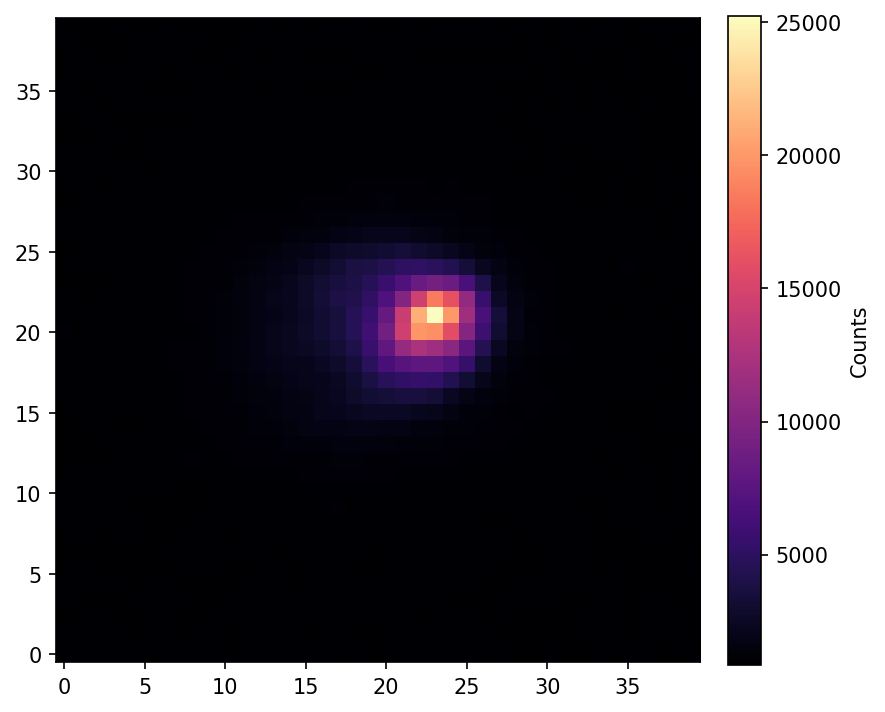

In [48]:
%matplotlib inline
plt.figure(figsize=(6,6), dpi=150)

# plot the image
im = plt.imshow(zoomed_images_ref[35], 
                origin='lower',cmap='magma')


# colorbar and aestheticcs
plt.colorbar(im,
             fraction=0.046, 
             pad=0.04,
             label='Counts',)

plt.tight_layout()

In [49]:
threshold=8000
y_centers_ref2 = np.array([])
x_centers_ref2 = np.array([])

for i in range(close_up_reference2.shape[0]):
    max_pix_y, max_pix_x = np.where(close_up_reference2[i,:,:] > threshold)
    y_center = int(math.ceil(np.median(max_pix_y)))
    x_center = int(math.ceil(np.median(max_pix_x)))
    y_centers_ref2 = np.append(y_centers_ref2, y_center)
    x_centers_ref2 = np.append(x_centers_ref2, x_center)

In [50]:
interval = 40
zoomed_images_ref2 = zoomed_image(close_up_reference2, x_centers_ref2, y_centers_ref2, interval )

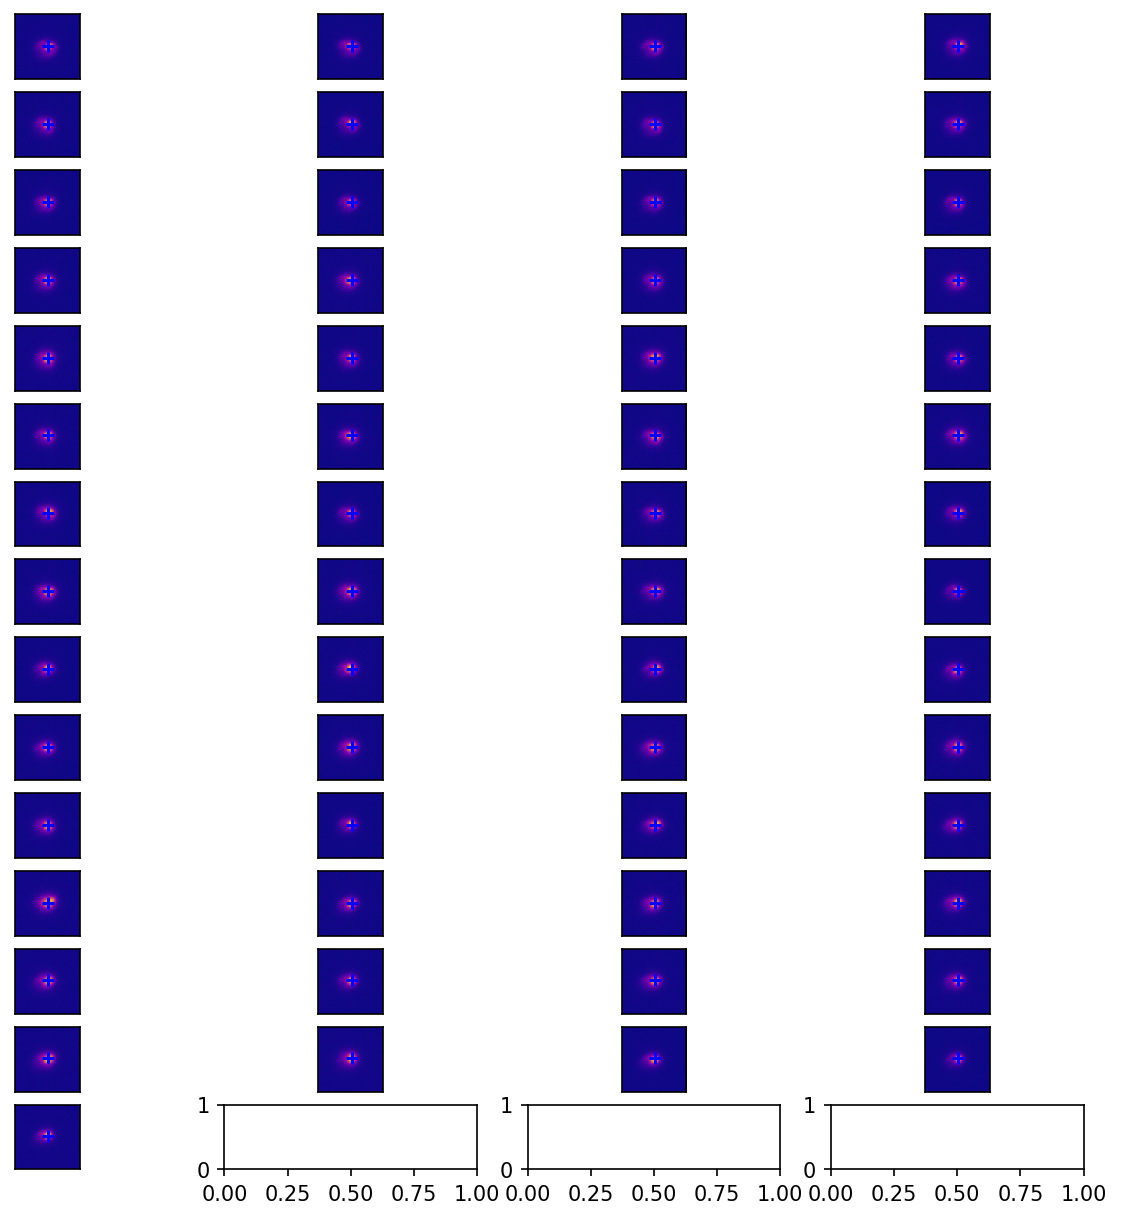

In [51]:
fig, axes = plt.subplots(nrows=15,ncols=4,dpi=150,figsize=(10,10))

for i, (image, ax) in enumerate(zip(zoomed_images_ref2, axes.flat)):
    im = ax.imshow(image, origin = 'lower', cmap = "plasma")
    ax.scatter(20,20, marker='+', color='blue')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

In [52]:
hdu_zoomed_images_ref2 = fits.PrimaryHDU(zoomed_images_ref2)
hdu_zoomed_images_ref2.writeto('zoomed_images_ref2.fits', overwrite = True)